In [447]:
# assignment 
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Helper Function

In [160]:
def sum_by_year(filename, group):
    df = pd.read_csv(filename)
    df_2021 = df[df['Year'] == 2021]
    df_2022 = df[df['Year'] == 2022]
    count_2021 = df_2021.groupby(group)["Hourly_Counts"].sum()
    count_2022 = df_2022.groupby(group)["Hourly_Counts"].sum()
    return (count_2021, count_2022)

def mean_by_year(filename, group):
    df = pd.read_csv(filename)
    df_2021 = df[df['Year'] == 2021]
    df_2022 = df[df['Year'] == 2022]
    count_2021 = df_2021.groupby(group)["Hourly_Counts"].mean()
    count_2022 = df_2022.groupby(group)["Hourly_Counts"].mean()
    return (count_2021, count_2022)

## Question 1

In [333]:
def question1():
    df = pd.read_csv("count2021-2022.csv")
    df_morning = df[(df['Year'] == 2022) & (df['Time'] == 8) & (df['Day']
                .isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']))]
    df_lunch = df[(df['Year'] == 2022) & (df['Time'] == 13) & (df['Day']
                .isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']))]
    df_evening = df[(df['Year'] == 2022) & (df['Time'] == 17) & (df['Day']
                .isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']))]
    
    result = {}
    df_morning = df_morning.groupby(['Month', 'Mdate'], as_index=False)["Hourly_Counts"].sum()
    median_morining = np.median(df_morning["Hourly_Counts"])
    mean_morning = np.mean(df_morning["Hourly_Counts"])
    max_morning = np.max(df_morning["Hourly_Counts"])
    min_morning = np.min(df_morning["Hourly_Counts"])
    result["Morning"] = [median_morining, mean_morning, max_morning, min_morning]

    df_lunch = df_lunch.groupby(['Month', 'Mdate'], as_index=False)["Hourly_Counts"].sum()
    median_lunch = np.median(df_lunch["Hourly_Counts"])
    mean_lunch = np.mean(df_lunch["Hourly_Counts"])
    max_lunch = np.max(df_lunch["Hourly_Counts"])
    min_lunch = np.min(df_lunch["Hourly_Counts"])
    result["Lunch"] = [median_lunch, mean_lunch, max_lunch, min_lunch]

    df_evening = df_evening.groupby(['Month', 'Mdate'], as_index=False)["Hourly_Counts"].sum()
    median_evening = np.median(df_evening["Hourly_Counts"])
    mean_evening = np.mean(df_evening["Hourly_Counts"])
    max_evening = np.max(df_evening["Hourly_Counts"])
    min_evening = np.min(df_evening["Hourly_Counts"])
    result["Evening"] = [median_evening, mean_evening, max_evening, min_evening]
    return result
    
question1()

{'Morning': [26439.0, 24440.51401869159, 39015, 6385],
 'Lunch': [41074.0, 39806.345794392524, 69513, 23677],
 'Evening': [45858.0, 44367.86915887851, 65235, 25165]}

## Question 2

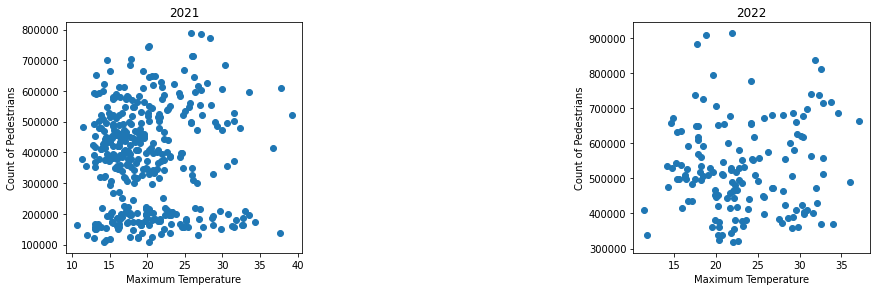

In [144]:
# def question2():
#     df = pd.read_csv("count2021-2022.csv")
#     df['Date'] = pd.to_datetime(df["Date_Time"]).dt.date
#     num = df.groupby("Date")["Hourly_Counts"].sum()
#     num = pd.DataFrame(num).reset_index()
#     num.columns = ['Date', 'Count']
#     num['Date'] = num['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))

#     temp = pd.read_csv("temperature-all-years/IDCJAC0010_086338_1800_Data.csv")
#     temp["Date"] = pd.to_datetime(temp[["Year", "Month", "Day"]])
#     max_temp = temp[["Date", "Maximum temperature (Degree C)"]]
#     max_temp = max_temp[max_temp['Date'].between("2021-01-01", "2022-05-31")]
#     max_temp['Date'] = max_temp['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
#     max_temp = max_temp.reset_index(drop=True)
#     max_temp.columns = ['Date', 'Maximum Temperature']
    
#     result = pd.merge(max_temp, num, how = 'left', on='Date')
#     plt.scatter(result["Maximum Temperature"], result["Count"])

# question2()

def question2():
    (count_2021, count_2022) = sum_by_year("count2021-2022.csv", ["Month", "Mdate"])
    temp = pd.read_csv("temperature-all-years/IDCJAC0010_086338_1800_Data.csv")
    temp_2021 = temp[temp["Year"] == 2021]
    temp_2022 = temp[(temp["Year"] == 2022) & (temp["Month"] < 6)]

    fig = plt.figure(figsize=(50, 50))
    ax = fig.add_subplot(10, 10, 1)
    ax.scatter(temp_2021["Maximum temperature (Degree C)"], count_2021)
    plt.xlabel("Maximum Temperature")
    plt.ylabel("Count of Pedestrians")
    plt.title("2021")
    ax = fig.add_subplot(10, 10, 3)
    ax.scatter(temp_2022["Maximum temperature (Degree C)"], count_2022)
    plt.xlabel("Maximum Temperature")
    plt.ylabel("Count of Pedestrians")
    plt.title("2022")

    


question2()

## Question 3

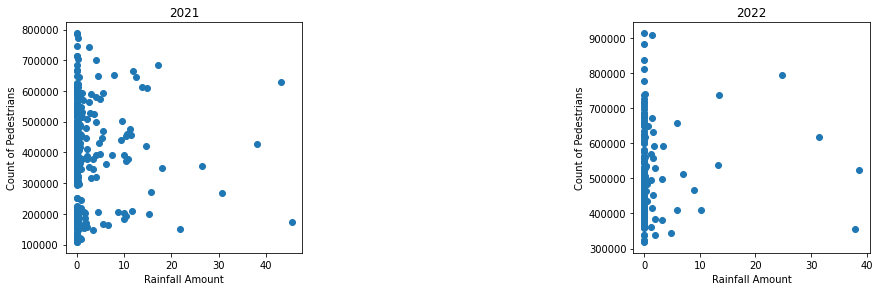

In [145]:
def question3():
    (count_2021, count_2022) = sum_by_year("count2021-2022.csv", ["Month", "Mdate"])
    rain = pd.read_csv("rainfall-all-years/IDCJAC0009_086338_1800_Data.csv")
    rain_2021 = rain[rain["Year"] == 2021]
    rain_2022 = rain[(rain["Year"] == 2022) & (rain["Month"] < 6)]

    fig = plt.figure(figsize=(50, 50))
    ax = fig.add_subplot(10, 10, 1)
    ax.scatter(rain_2021["Rainfall amount (millimetres)"], count_2021)
    plt.xlabel("Rainfall Amount")
    plt.ylabel("Count of Pedestrians")
    plt.title("2021")
    ax = fig.add_subplot(10, 10, 3)
    ax.scatter(rain_2022["Rainfall amount (millimetres)"], count_2022)
    plt.xlabel("Rainfall Amount")
    plt.ylabel("Count of Pedestrians")
    plt.title("2022")


question3()
    

## Question 4

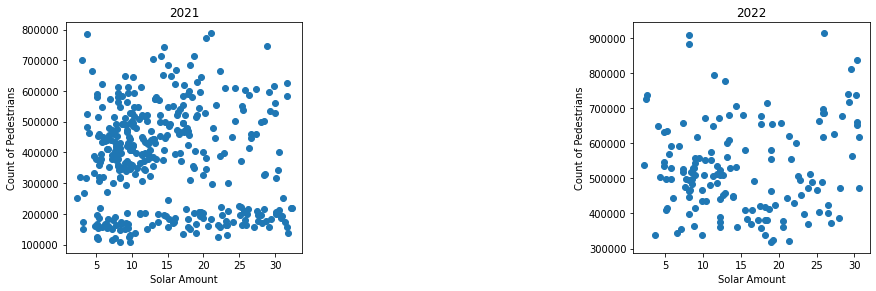

In [146]:
def question4():
    (count_2021, count_2022) = sum_by_year("count2021-2022.csv", ["Month", "Mdate"])
    solar = pd.read_csv("solar-all-years/IDCJAC0016_086338_1800_Data.csv")
    solar_2021 = solar[solar["Year"] == 2021]
    solar_2022 = solar[(solar["Year"] == 2022) & (solar["Month"] < 6)]

    fig = plt.figure(figsize=(50, 50))
    ax = fig.add_subplot(10, 10, 1)
    ax.scatter(solar_2021["Daily global solar exposure (MJ/m*m)"], count_2021)
    plt.xlabel("Solar Amount")
    plt.ylabel("Count of Pedestrians")
    plt.title("2021")
    ax = fig.add_subplot(10, 10, 3)
    ax.scatter(solar_2022["Daily global solar exposure (MJ/m*m)"], count_2022)
    plt.xlabel("Solar Amount")
    plt.ylabel("Count of Pedestrians")
    plt.title("2022")


question4()

## Question 5

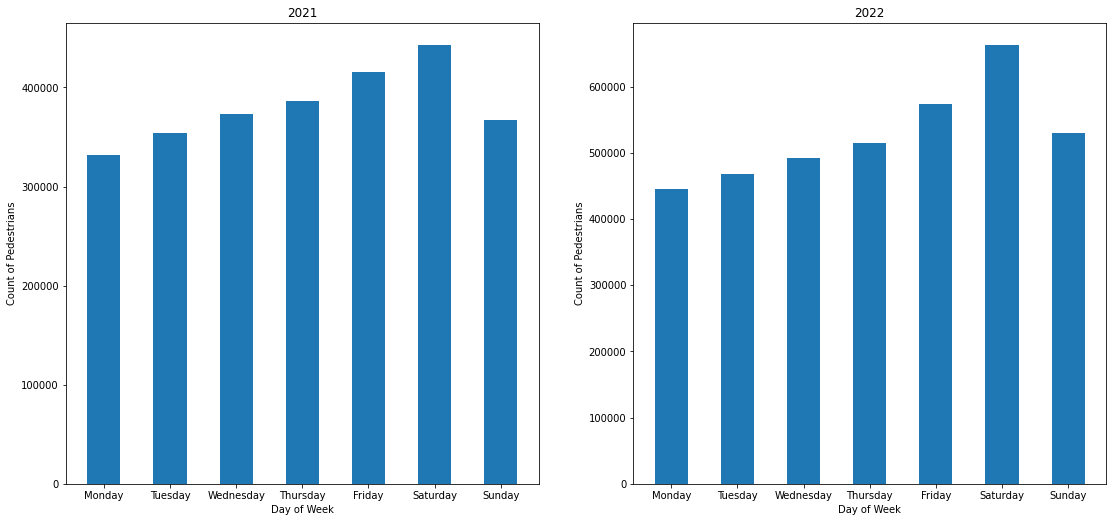

In [319]:
def question5():
    bars = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')

    df = pd.read_csv("count2021-2022.csv")
    df["Date_Time"] = pd.to_datetime(df["Date_Time"]).dt.date
    df_2021 = df[df['Year'] == 2021]
    df_2022 = df[df['Year'] == 2022]

    count_2021 = df_2021.groupby("Day").agg({'Date_Time': 'nunique', 'Hourly_Counts': 'sum'}).reindex(bars)
    count_2021['Average'] = count_2021['Hourly_Counts'] / count_2021['Date_Time']
    count_2022 = df_2022.groupby("Day").agg({'Date_Time': 'nunique', 'Hourly_Counts': 'sum'}).reindex(bars)
    count_2022['Average'] = count_2022['Hourly_Counts'] / count_2022['Date_Time']

    plt.rcParams["figure.figsize"] = (8,8)
    fig = plt.figure(figsize=(100, 100))
    ax = fig.add_subplot(10, 10, 1)
    ax.bar(bars, count_2021['Average'],  width = 0.5)
    plt.xlabel("Day of Week")
    plt.ylabel("Count of Pedestrians")
    plt.title("2021")
    ax = fig.add_subplot(10, 10, 2)
    ax.bar(bars, count_2022['Average'],  width = 0.5)
    plt.xlabel("Day of Week")
    plt.ylabel("Count of Pedestrians")
    plt.title("2022")

question5()

## Question 6

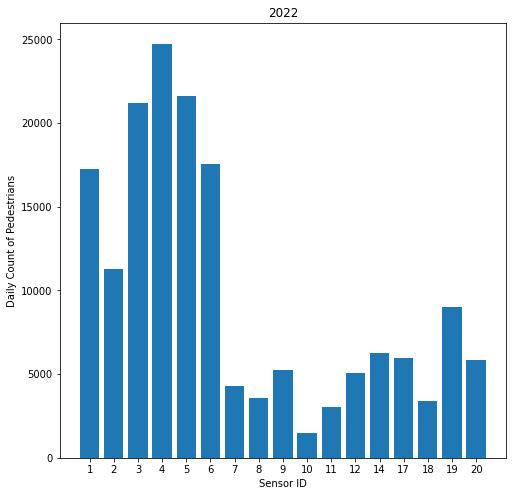

In [276]:
def question6():
    df = pd.read_csv("count2021-2022.csv")
    df["Date_Time"] = pd.to_datetime(df["Date_Time"]).dt.date
    df = df[(df['Year'] == 2022) & (df["Sensor_ID"] <= 20) & (df["Sensor_ID"] >= 1)]
    count_2022 = df.groupby(["Sensor_ID"]).agg({'Date_Time': 'nunique', 'Hourly_Counts': 'sum'})
    count_2022['Average'] = count_2022['Hourly_Counts'] / count_2022['Date_Time']
    count_2022 = pd.DataFrame(count_2022).reset_index()
    count_2022.columns = ['Sensor_ID', 'Date', 'Count', 'Average']
    count_2022['Sensor_ID'] = count_2022['Sensor_ID'].astype(str)

    plt.bar(count_2022['Sensor_ID'], count_2022['Average'])
    plt.xlabel("Sensor ID")
    plt.ylabel("Daily Count of Pedestrians")
    plt.title("2022")

question6()

## Question 7

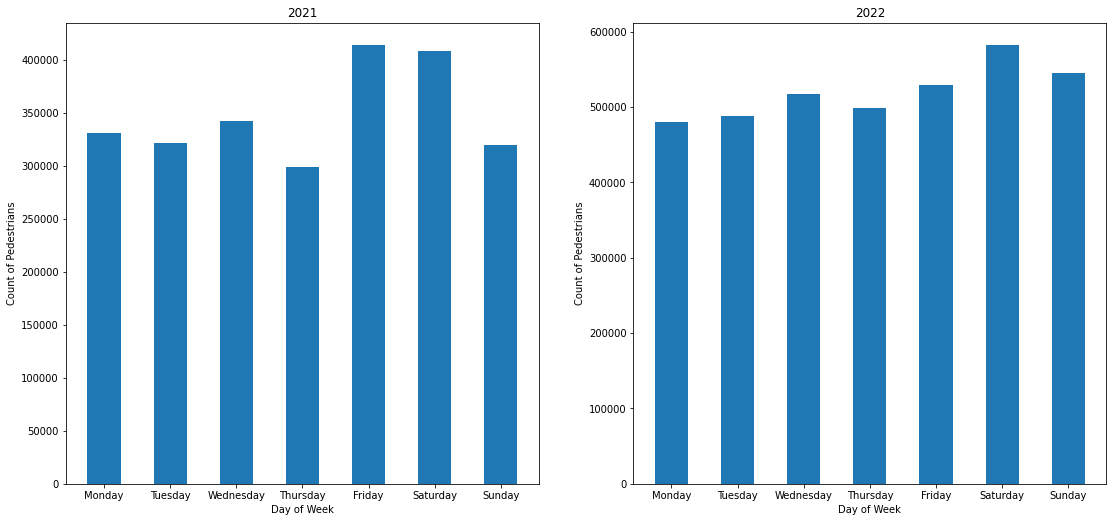

In [325]:
def question7():
    df = pd.read_csv("count2021-2022.csv")
    df['Date'] = pd.to_datetime(df["Date_Time"]).dt.date
    df['Date'] = df['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
    df = df.groupby(["Day","Date"], as_index=False)["Hourly_Counts"].sum()
    df.columns = ['Day', 'Date', 'Daily_Counts']

    df_rain = pd.read_csv("rainfall-all-years/IDCJAC0009_086338_1800_Data.csv")
    df_rain["Date"] = pd.to_datetime(df_rain[["Year", "Month", "Day"]])
    df_rain = df_rain[["Date", "Rainfall amount (millimetres)"]]
    df_rain = df_rain[df_rain['Date'].between("2021-01-01", "2022-05-31")]
    df_rain['Date'] = df_rain['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
    df_rain = df_rain.reset_index(drop=True)
    df_rain.columns = ['Date', 'Rainfall amount (millimetres)']

    bars = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
    result = pd.merge(df, df_rain, how = 'left', on='Date')
    result = result[result["Rainfall amount (millimetres)"] > 0]
    df_2021 = result[result['Date'] < '2022-01-01']
    df_2021 = df_2021.groupby(["Day"])["Daily_Counts"].mean().reindex(bars)
    df_2022 = result[result['Date'] >= '2022-01-01']
    df_2022 = df_2022.groupby(["Day"])["Daily_Counts"].mean().reindex(bars)
     
    plt.rcParams["figure.figsize"] = (8,8)
    fig = plt.figure(figsize=(100, 100))
    ax = fig.add_subplot(10, 10, 1)
    ax.bar(bars, df_2021,  width = 0.5)
    plt.xlabel("Day of Week")
    plt.ylabel("Count of Pedestrians")
    plt.title("2021")
    ax = fig.add_subplot(10, 10, 2)
    ax.bar(bars, df_2022,  width = 0.5)
    plt.xlabel("Day of Week")
    plt.ylabel("Count of Pedestrians")
    plt.title("2022")

question7()

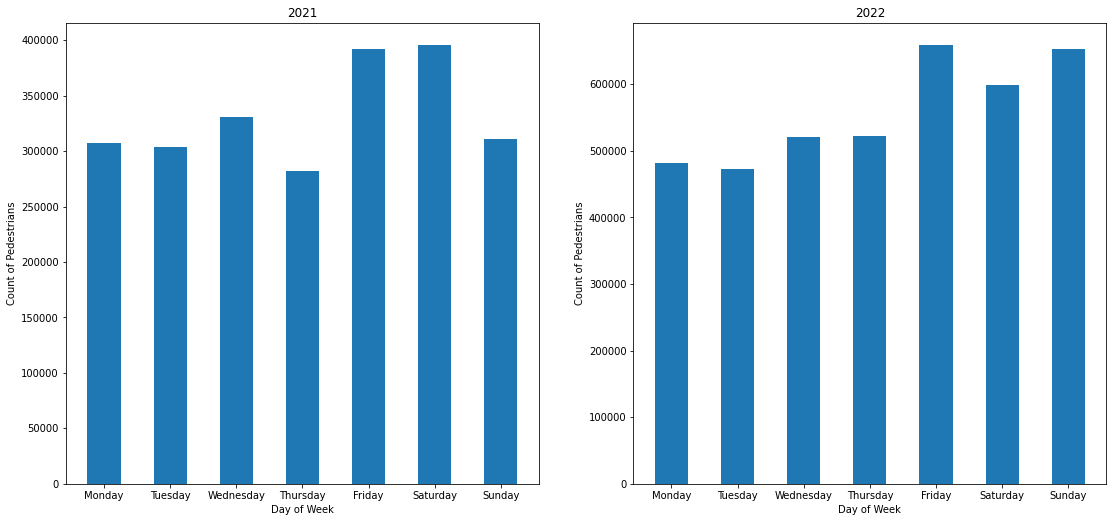

In [327]:
def question8():
    df = pd.read_csv("count2021-2022.csv")
    df['Date'] = pd.to_datetime(df["Date_Time"]).dt.date
    df['Date'] = df['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
    df = df.groupby(["Day","Date"], as_index=False)["Hourly_Counts"].sum()
    df.columns = ['Day', 'Date', 'Daily_Counts']

    df_rain = pd.read_csv("rainfall-all-years/IDCJAC0009_086338_1800_Data.csv")
    df_rain["Date"] = pd.to_datetime(df_rain[["Year", "Month", "Day"]])
    df_rain = df_rain[["Date", "Rainfall amount (millimetres)"]]
    df_rain = df_rain[df_rain['Date'].between("2021-01-01", "2022-05-31")]
    df_rain['Date'] = df_rain['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
    df_rain = df_rain.reset_index(drop=True)
    df_rain.columns = ['Date', 'Rainfall amount (millimetres)']

    df_temp = pd.read_csv("temperature-all-years/IDCJAC0010_086338_1800_Data.csv")
    df_temp["Date"] = pd.to_datetime(df_temp[["Year", "Month", "Day"]])
    df_temp = df_temp[["Date", "Maximum temperature (Degree C)"]]
    df_temp = df_temp[df_temp['Date'].between("2021-01-01", "2022-05-31")]
    df_temp['Date'] = df_temp['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
    df_temp = df_temp.reset_index(drop=True)
    df_temp.columns = ['Date', 'Maximum temperature (Degree C)']

    df = pd.merge(df, df_rain, how = 'left', on='Date')
    result = pd.merge(df, df_temp, how = 'left', on='Date')

    bars = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
    result = result[(result["Rainfall amount (millimetres)"] > 0) & (result["Maximum temperature (Degree C)"] < 20)]
    df_2021 = result[result['Date'] < '2022-01-01']
    df_2021 = df_2021.groupby(["Day"])["Daily_Counts"].mean().reindex(bars)
    df_2022 = result[result['Date'] >= '2022-01-01']
    df_2022 = df_2022.groupby(["Day"])["Daily_Counts"].mean().reindex(bars)

    plt.rcParams["figure.figsize"] = (8,8)
    fig = plt.figure(figsize=(100, 100))
    ax = fig.add_subplot(10, 10, 1)
    ax.bar(bars, df_2021,  width = 0.5)
    plt.xlabel("Day of Week")
    plt.ylabel("Count of Pedestrians")
    plt.title("2021")
    ax = fig.add_subplot(10, 10, 2)
    ax.bar(bars, df_2022,  width = 0.5)
    plt.xlabel("Day of Week")
    plt.ylabel("Count of Pedestrians")
    plt.title("2022")

question8()
    

##  Question 9

In [362]:
def question9():
    df = pd.read_csv("count2021-2022.csv")
    df["Date_Time"] = pd.to_datetime(df["Date_Time"]).dt.date
    df_2021 = df[(df['Year'] == 2021) & (df['Month'] == 'May')]
    df_2022 = df[(df['Year'] == 2022) & (df['Month'] == 'May')]
    df_2021 = df_2021.groupby(["Sensor_ID", "Mdate"], as_index=False)['Hourly_Counts'].sum()
    df_2021.columns = ["Sensor_ID", "Mdate", "Counts_2021"]
    df_2022 = df_2022.groupby(["Sensor_ID", "Mdate"], as_index=False)['Hourly_Counts'].sum()
    df_2022.columns = ["Sensor_ID", "Mdate", "Counts_2022"]
    df = pd.merge(df_2021, df_2022, how = 'inner', on=['Mdate', 'Sensor_ID'])
    df['Diff'] = np.square(df['Counts_2022'] - df['Counts_2021'])
    df = df.groupby(["Sensor_ID"], as_index=False)['Diff'].sum()
    df['Diff'] = np.sqrt(df['Diff'])
    max = df.iloc[df['Diff'].idxmax()]
    return max

question9()

Sensor_ID       24.000000
Diff         85844.364498
Name: 16, dtype: float64

## Question 10

In [450]:
def question10():
    df = pd.read_csv("count2021-2022.csv")
    df = df[(df["Month"].isin(['January', 'February', 'March', 'April'])) & (df['Sensor_ID'] == 3) & (df['Time'] == 12) & (df['Year'] == 2022)]
    df['Date'] = pd.to_datetime(df["Date_Time"]).dt.date
    df['Date'] = df['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
    df = df.groupby(["Date", "Day"], as_index=False)["Hourly_Counts"].sum()
    df.columns = ['Date', 'Day', 'Counts_12pm']
    df2 = pd.read_csv("count2021-2022.csv")
    df2 = df2[(df2["Month"].isin(['January', 'February', 'March', 'April'])) & (df2['Sensor_ID'] == 3) & (df2['Time'] == 11) & (df2['Year'] == 2022)]
    df2['Date'] = pd.to_datetime(df2["Date_Time"]).dt.date
    df2['Date'] = df2['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
    df2 = df2.groupby(["Date", "Day"], as_index=False)["Hourly_Counts"].sum()
    df2.columns = ['Date', 'Day', 'Counts_11am']
    df3 = pd.read_csv("count2021-2022.csv")
    df3 = df3[(df3["Month"].isin(['January', 'February', 'March', 'April'])) & (df3['Sensor_ID'] == 4) & (df3['Time'] == 11) & (df3['Year'] == 2022)]
    df3['Date'] = pd.to_datetime(df3["Date_Time"]).dt.date
    df3['Date'] = df3['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
    df3 = df3.groupby(["Date", "Day"], as_index=False)["Hourly_Counts"].sum()
    df3.columns = ['Date', 'Day', 'Counts_12pm_Bourke']
    df3['Counts_12pm_Bourke'] = df3['Counts_12pm_Bourke'].shift()

    df_rain = pd.read_csv("rainfall-all-years/IDCJAC0009_086338_1800_Data.csv")
    df_rain["Date"] = pd.to_datetime(df_rain[["Year", "Month", "Day"]])
    df_rain = df_rain[["Date", "Rainfall amount (millimetres)"]]
    df_rain = df_rain[df_rain['Date'].between("2022-01-01", "2022-04-30")]
    df_rain['Date'] = df_rain['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
    df_rain = df_rain.reset_index(drop=True)
    df_rain.columns = ['Date', 'Rainfall amount (millimetres)']
    df_rain['Prev_rainfall'] = df_rain['Rainfall amount (millimetres)'].shift()

    df_temp = pd.read_csv("temperature-all-years/IDCJAC0010_086338_1800_Data.csv")
    df_temp["Date"] = pd.to_datetime(df_temp[["Year", "Month", "Day"]])
    df_temp = df_temp[["Date", "Maximum temperature (Degree C)"]]
    df_temp = df_temp[df_temp['Date'].between("2022-01-01", "2022-04-30")]
    df_temp['Date'] = df_temp['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
    df_temp = df_temp.reset_index(drop=True)
    df_temp.columns = ['Date', 'Maximum temperature (Degree C)']
    df_temp['Prev_temp'] = df_temp['Maximum temperature (Degree C)'].shift()
    
    df_solar = pd.read_csv("solar-all-years/IDCJAC0016_086338_1800_Data.csv")
    df_solar["Date"] = pd.to_datetime(df_solar[["Year", "Month", "Day"]])
    df_solar = df_solar[["Date", "Daily global solar exposure (MJ/m*m)"]]
    df_solar = df_solar[df_solar['Date'].between("2022-01-01", "2022-04-30")]
    df_solar['Date'] = df_solar['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
    df_solar = df_solar.reset_index(drop=True)
    df_solar.columns = ['Date', "Daily global solar exposure (MJ/m*m)"]
    df_solar['Prev_solar'] = df_solar["Daily global solar exposure (MJ/m*m)"].shift()

    df = pd.merge(df, df2, on='Date', how='left')
    df = pd.merge(df, df3, on='Date', how='left')
    df = pd.merge(df, df_rain, on='Date', how='left')
    df = pd.merge(df, df_temp, on='Date', how='left')
    df = pd.merge(df, df_solar, on='Date', how='left')
    df = df[['Date', 'Day', 'Counts_12pm', 'Counts_11am', 'Counts_12pm_Bourke', 'Prev_rainfall', 'Prev_temp', 'Prev_solar']]
    feature_cols = ['Counts_11am', 'Counts_12pm_Bourke', 'Prev_rainfall', 'Prev_temp', 'Prev_solar']
    df = df.iloc[1:, :]
    X = df.loc[:, feature_cols]
    y = df["Counts_12pm"]
    print(X)
    logreg = LinearRegression().fit(X, y)

    df = pd.read_csv("count2021-2022.csv")
    df = df[(df["Month"] == 'May') & (df['Sensor_ID'] == 3) & (df['Time'] == 12) & (df['Year'] == 2022)]
    df['Date'] = pd.to_datetime(df["Date_Time"]).dt.date
    df['Date'] = df['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
    df = df.groupby(["Date", "Day"], as_index=False)["Hourly_Counts"].sum()
    df.columns = ['Date', 'Day', 'Counts_12pm']
    df2 = pd.read_csv("count2021-2022.csv")
    df2 = df2[(df2["Month"] == 'May') & (df2['Sensor_ID'] == 3) & (df2['Time'] == 11) & (df2['Year'] == 2022)]
    df2['Date'] = pd.to_datetime(df2["Date_Time"]).dt.date
    df2['Date'] = df2['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
    df2 = df2.groupby(["Date", "Day"], as_index=False)["Hourly_Counts"].sum()
    df2.columns = ['Date', 'Day', 'Counts_11am']
    df3 = pd.read_csv("count2021-2022.csv")
    df3 = df3[(df3["Month"] == 'May') & (df3['Sensor_ID'] == 1) & (df3['Time'] == 11) & (df3['Year'] == 2022)]
    df3['Date'] = pd.to_datetime(df3["Date_Time"]).dt.date
    df3['Date'] = df3['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
    df3 = df3.groupby(["Date", "Day"], as_index=False)["Hourly_Counts"].sum()
    df3.columns = ['Date', 'Day', 'Counts_12pm_Bourke']
    df3['Counts_12pm_Bourke'] = df3['Counts_12pm_Bourke'].shift()

    df_rain = pd.read_csv("rainfall-all-years/IDCJAC0009_086338_1800_Data.csv")
    df_rain["Date"] = pd.to_datetime(df_rain[["Year", "Month", "Day"]])
    df_rain = df_rain[["Date", "Rainfall amount (millimetres)"]]
    df_rain = df_rain[df_rain['Date'].between("2022-05-01", "2022-05-31")]
    df_rain['Date'] = df_rain['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
    df_rain = df_rain.reset_index(drop=True)
    df_rain.columns = ['Date', 'Rainfall amount (millimetres)']
    df_rain['Prev_rainfall'] = df_rain['Rainfall amount (millimetres)'].shift()

    df_temp = pd.read_csv("temperature-all-years/IDCJAC0010_086338_1800_Data.csv")
    df_temp["Date"] = pd.to_datetime(df_temp[["Year", "Month", "Day"]])
    df_temp = df_temp[["Date", "Maximum temperature (Degree C)"]]
    df_temp = df_temp[df_temp['Date'].between("2022-05-01", "2022-05-31")]
    df_temp['Date'] = df_temp['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
    df_temp = df_temp.reset_index(drop=True)
    df_temp.columns = ['Date', 'Maximum temperature (Degree C)']
    df_temp['Prev_temp'] = df_temp['Maximum temperature (Degree C)'].shift()
    
    df_solar = pd.read_csv("solar-all-years/IDCJAC0016_086338_1800_Data.csv")
    df_solar["Date"] = pd.to_datetime(df_solar[["Year", "Month", "Day"]])
    df_solar = df_solar[["Date", "Daily global solar exposure (MJ/m*m)"]]
    df_solar = df_solar[df_solar['Date'].between("2022-05-01", "2022-05-31")]
    df_solar['Date'] = df_solar['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
    df_solar = df_solar.reset_index(drop=True)
    df_solar.columns = ['Date', "Daily global solar exposure (MJ/m*m)"]
    df_solar['Prev_solar'] = df_solar["Daily global solar exposure (MJ/m*m)"].shift()

    df = pd.merge(df, df2, on='Date', how='left')
    df = pd.merge(df, df3, on='Date', how='left')
    df = pd.merge(df, df_rain, on='Date', how='left')
    df = pd.merge(df, df_temp, on='Date', how='left')
    df = pd.merge(df, df_solar, on='Date', how='left')
    df = df[['Date', 'Day', 'Counts_12pm', 'Counts_11am', 'Counts_12pm_Bourke', 'Prev_rainfall', 'Prev_temp', 'Prev_solar']]
    feature_cols = ['Counts_11am', 'Counts_12pm_Bourke', 'Prev_rainfall', 'Prev_temp', 'Prev_solar']
    df = df.iloc[1:, :]

   
    result = {}
    df1 = df[df['Day'] == 'Monday'].iloc[1:, :]
    X_test1 = df[df['Day'] == 'Monday'].iloc[1:, :].loc[:, feature_cols]
    y_test1 = logreg.predict(X_test1)
    print (y_test1, df1['Counts_12pm'])
    score = mean_squared_error(df1['Counts_12pm'], y_test1)
    score2 = r2_score(df1['Counts_12pm'], y_test1)
    result['Monday'] = [score, score2]

    df1 = df[df['Day'] == 'Tuesday'].iloc[1:, :]
    X_test1 = df[df['Day'] == 'Tuesday'].iloc[1:, :].loc[:, feature_cols]
    y_test1 = logreg.predict(X_test1)
    print (y_test1, df1['Counts_12pm'])
    score = mean_squared_error(df1['Counts_12pm'], y_test1)
    score2 = r2_score(df1['Counts_12pm'], y_test1)
    result['Tuesday'] = [score, score2]

    df1 = df[df['Day'] == 'Wednesday'].iloc[1:, :]
    X_test1 = df[df['Day'] == 'Wednesday'].iloc[1:, :].loc[:, feature_cols]
    y_test1 = logreg.predict(X_test1)
    print (y_test1, df1['Counts_12pm'])
    score = mean_squared_error(df1['Counts_12pm'], y_test1)
    score2 = r2_score(df1['Counts_12pm'], y_test1)
    result['Wednesday'] = [score, score2]

    df1 = df[df['Day'] == 'Thursday'].iloc[1:, :]
    X_test1 = df[df['Day'] == 'Thursday'].iloc[1:, :].loc[:, feature_cols]
    y_test1 = logreg.predict(X_test1)
    print (y_test1, df1['Counts_12pm'])
    score = mean_squared_error(df1['Counts_12pm'], y_test1)
    score2 = r2_score(df1['Counts_12pm'], y_test1)
    result['Thursday'] = [score, score2]

    df1 = df[df['Day'] == 'Friday'].iloc[1:, :]
    X_test1 = df[df['Day'] == 'Friday'].iloc[1:, :].loc[:, feature_cols]
    y_test1 = logreg.predict(X_test1)
    print (y_test1, df1['Counts_12pm'])
    score = mean_squared_error(df1['Counts_12pm'], y_test1)
    score2 = r2_score(df1['Counts_12pm'], y_test1)
    result['Friday'] = [score, score2]

    df1 = df[df['Day'] == 'Saturday'].iloc[1:, :]
    X_test1 = df[df['Day'] == 'Saturday'].iloc[1:, :].loc[:, feature_cols]
    y_test1 = logreg.predict(X_test1)
    print (y_test1, df1['Counts_12pm'])
    score = mean_squared_error(df1['Counts_12pm'], y_test1)
    score2 = r2_score(df1['Counts_12pm'], y_test1)
    result['Saturday'] = [score, score2]

    df1 = df[df['Day'] == 'Sunday'].iloc[1:, :]
    X_test1 = df[df['Day'] == 'Sunday'].iloc[1:, :].loc[:, feature_cols]
    y_test1 = logreg.predict(X_test1)
    print (y_test1, df1['Counts_12pm'])
    score = mean_squared_error(df1['Counts_12pm'], y_test1)
    score2 = r2_score(df1['Counts_12pm'], y_test1)
    result['Sunday'] = [score, score2]


    return result

question10()

     Counts_11am  Counts_12pm_Bourke  Prev_rainfall  Prev_temp  Prev_solar
1            676               943.0            0.0       37.1        25.3
2            822              1239.0            0.0       30.9        25.9
3            832              1497.0            0.0       20.3        30.3
4            723              1516.0            0.0       23.1        11.8
5            712              1518.0            0.0       29.3        19.0
..           ...                 ...            ...        ...         ...
115         1095              2760.0            0.0       24.2        12.9
116          935              1893.0            0.0       23.1        11.1
117          986              1699.0            0.0       22.0         8.1
118         1082              1767.0            0.0       22.4         7.3
119         1136              1800.0            0.0       20.8         4.9

[119 rows x 5 columns]
[1501.17330484 1597.76090807 1546.08507518 1129.91626483] 8     1476
15    1

{'Monday': [68016.93733483921, 0.25443477047897667],
 'Tuesday': [10758.005516781795, 0.6776989696503974],
 'Wednesday': [22112.937259393027, -2.3550766265642338],
 'Thursday': [6547.637196873716, -0.572607140581326],
 'Friday': [2867.6400110778054, 0.5090404790043326],
 'Saturday': [415.96466780598195, 0.640238130861634],
 'Sunday': [973.778937520744, 0.9404206009756305]}

In [418]:
df_solar = pd.read_csv("count2021-2022.csv")
df_solar

,ID,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
0,3482939,"January 01, 2021 12:00:00 AM",2021,January,1,Friday,0,4,Town Hall (West),1461
1,3482940,"January 01, 2021 12:00:00 AM",2021,January,1,Friday,0,17,Collins Place (South),79
2,3482941,"January 01, 2021 12:00:00 AM",2021,January,1,Friday,0,18,Collins Place (North),33
3,3482942,"January 01, 2021 12:00:00 AM",2021,January,1,Friday,0,53,Collins St (North),196
4,3482943,"January 01, 2021 12:00:00 AM",2021,January,1,Friday,0,2,Bourke Street Mall (South),236
...,...,...,...,...,...,...,...,...,...,...
837590,4326000,"May 31, 2022 07:00:00 PM",2022,May,31,Tuesday,19,86,Queensberry St - Errol St (South),72
837591,4326001,"May 31, 2022 08:00:00 PM",2022,May,31,Tuesday,20,86,Queensberry St - Errol St (South),52
837592,4326002,"May 31, 2022 09:00:00 PM",2022,May,31,Tuesday,21,86,Queensberry St - Errol St (South),27
837593,4326003,"May 31, 2022 10:00:00 PM",2022,May,31,Tuesday,22,86,Queensberry St - Errol St (South),40


In [ ]:
count_file = "count2021-2022.csv"
rain_file = "rainfall-all-years/IDCJAC0009_086338_1800_Data.csv"
temp_file = "temperature-all-years/IDCJAC0010_086338_1800_Data.csv"
solar_file = "solar-all-years/IDCJAC0016_086338_1800_Data.csv"
# read files
pedestrain_df = pd.read_csv(count_file)
rainfall_df = pd.read_csv(rain_file)
temperature_df = pd.read_csv(temp_file)
solar_df = pd.read_csv(solar_file)
# add date_key column in format 'YearMonthMdate'
month_dict = {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12}
pedestrain_df["date_key"] = pedestrain_df["Year"].astype(str) + pedestrain_df["Month"].map(month_dict).astype(str) + pedestrain_df["Mdate"].astype(str)

# join rainfall dataframe based on column date_key
rainfall_df["date_key"] = rainfall_df["Year"].astype(str) + rainfall_df["Month"].astype(str) + rainfall_df["Day"].astype(str)
rainfall_df.drop(["Product code","Bureau of Meteorology station number", "Period over which rainfall was measured (days)","Quality", "Year", "Month", "Day"],axis = 1, inplace = True)
rainfall_dict = list(rainfall_df.set_index(rainfall_df.date_key).drop("date_key", axis = 1).to_dict().values())[0]

# join temperature dataframe based on column date_key
temperature_df["date_key"] = temperature_df["Year"].astype(str) + temperature_df["Month"].astype(str) + temperature_df["Day"].astype(str)
temperature_df.drop(["Product code","Bureau of Meteorology station number",  "Year", "Month", "Day", "Days of accumulation of maximum temperature", "Quality"],axis = 1, inplace = True)
temperature_dict = list(temperature_df.set_index(temperature_df.date_key).drop("date_key", axis = 1).to_dict().values())[0]

# join solar dataframe based on column date_key
solar_df["date_key"] = solar_df["Year"].astype(str) + solar_df["Month"].astype(str) + solar_df["Day"].astype(str)
solar_df.drop(["Product code","Bureau of Meteorology station number",  "Year", "Month", "Day"],axis = 1, inplace = True)
solar_dict = list(solar_df.set_index(solar_df.date_key).drop("date_key", axis = 1).to_dict().values())[0]

pedestrain_df["Rainfall amount (millimetres)"] = pedestrain_df["date_key"].map(rainfall_dict)
pedestrain_df["Maximum temperature (Degree C)"] = pedestrain_df["date_key"].map(temperature_dict)
pedestrain_df["Daily global solar exposure (MJ/m*m)"] = pedestrain_df["date_key"].map(solar_dict)
df = pedestrain_df

# remove any row with null value in rainfall amount, max temperature, solar exposure
xcut = (df["Rainfall amount (millimetres)"].isnull() | df["Maximum temperature (Degree C)"].isnull() | df["Daily global solar exposure (MJ/m*m)"].isnull())
df = df[xcut == False].reset_index(drop = True)
df.Date_Time = pd.to_datetime(df.Date_Time)